<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Прочитаем файл data.csv из папки /datasets и сохраним его в переменной df и выведем на экран первые десять строк таблицы.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Одной командой получим общую информацию о таблице:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице двадцать два столбца. Типы данных в столбцах — `bool`, `float`, `int`, `object`.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

В данных встречаются два типа числовых данных, что может создать проблемы во время исследования.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Дата и время в столбце `first_day_exposition` находится не в нужном формате, т.е. весомые данные в этом столбце это дата, а не время.

### Вывод

В таблице — данные объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, два типа числовых значений. Так же следует изменить формат даты в столбце `first_day_exposition`.

Устраним проблемы в данных.

## Предобработка данных

In [4]:
df.duplicated().sum()

0

Дубликатов нет.

Посчитаем, сколько в таблице пропущенных значений и посмотрим где именно они пропущенны.

In [5]:
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски могли возникнуть по причине того, что люди просто не указали данные.

Разберёмся с пропусками.

Заменим пропуски в days_exposition и заменим тип данных.

In [6]:
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

Разберёмся с пропусками в locality_name.

In [7]:
df['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [8]:
print('Количество уникальных значений названий городов',
      len(df['locality_name'].unique()))
df['locality_name'] = df['locality_name'].str.lower()

print('Количество уникальных значений названий городов приведённых к нижнему регистру',
      len(df['locality_name'].unique()))

Количество уникальных значений названий городов 365
Количество уникальных значений названий городов приведённых к нижнему регистру 365


Приведение к нижнему регистру не сократило число уникальных значений, выведем названия городов.

В названиях можно заметить проблему с буквами е и ё. Заменим букву ё на е.

In [9]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
len(df['locality_name'].unique())

331

Число уникальных значений сократилось. Посмотрим на пропуски в столбце с названиями городов.

In [10]:
df['locality_name'].isna().sum()

49

Пропусков в этом столбце мало, их можно удалить, чтобы не мешали при анализе.

In [11]:
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

Приведём формат даты столбца `first_day_exposition` к виду год-месяц-день, так как время не указано.

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

Теперь разберёмся с количеством балконов, апартаментами, студиями и квартирами со свободной планировкой.

Пропущенные значения в столбце с количеством балокон скорее всего означает, что балконов нет. Схожая ситуация с апартаментами, студиями и свободной планировкой, где пропуски означают то, что квартира не походит под это описание, заменим пропуски нулями и столбец балкону сразу приведём к целочисленному формату.

In [13]:
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)
df['open_plan'] = df['open_plan'].fillna(0)
df['studio'] = df['studio'].fillna(0)

Сократим цену до миллионов, оставив 3 знака после запятой для удобства просмотра

In [14]:
df['last_price'] = df['last_price'] / 1000000 
df['last_price'] = df['last_price'].round(3)

Заполним пропуски в ceiling_height медианными значениями.

In [15]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Заполним пропуски в living_area. Сначала найдём коэффициент соотношения общей площади к живой, а затем найдём жилую площадь поделив общую на найденный коэффициент и заполним пропуски.

In [16]:
k_area = df[df['living_area'].isnull() == False]['total_area'].mean() / df[df['living_area'].isnull()== False]['living_area'].mean()

df['living_area'] = df['living_area'].fillna(df['total_area']/k_area)

Остальные столбцы оставим такими какие они есть, так как их заполнение может быть неверным и создаст помехи в данных.

Посмотрим на результат предобраотки данных.

In [17]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,91.176001,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_ar

## Расчёты и добавление результатов в таблицу

Добавим в таблицу цену квадратного метра.

In [19]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')

Добавим день недели, месяц и год публикации объявления.

In [20]:
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Добавим этаж квартиры с вариантами — первый, последний, другой.

In [21]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['floor_name'] = df.apply(floor, axis=1)

Добавим соотношение жилой и общей площади, отношение площади кухни к общей, а также цену квадратного метра.

In [22]:
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']
df['price_per_square_meter'] = df['last_price'] / df['total_area']

Проверим работу кода.

In [23]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day,month,year,floor_name,living_area_ratio,kitchen_area_ratio
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,0.120370,3,3,2019,другой,0.472222,0.231481
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,0.082921,1,12,2018,первый,0.460396,0.272277
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,0.092786,3,8,2015,другой,0.612500,0.148214
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,91.176001,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,0.408176,4,7,2015,другой,0.573434,NaN
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,0.100000,1,6,2018,другой,0.320000,0.410000


<div style="border:solid green 2px; padding: 20px"> <b>Отлично:</b><br>
   Расчеты корректные, функция отрабатывает верно. Отличная работа!</div>       

## Исследовательский анализ данных

Задача 1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [24]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.000000,23650.000000,23650.000000,23650.000000
mean,60.329069,6.541127,2.070106,2.724311
std,35.661808,10.896399,1.078620,0.989255
min,12.000000,0.012000,0.000000,1.000000
25%,40.000000,3.400000,1.000000,2.600000
50%,52.000000,4.650000,2.000000,2.650000
75%,69.700000,6.799000,3.000000,2.700000
max,900.000000,763.000000,19.000000,100.000000


В данных можно заметить выбросы. Например, высота потолков 100 метров и 1 метр выглядят нереалистично. Избавимся от этих выбросов.

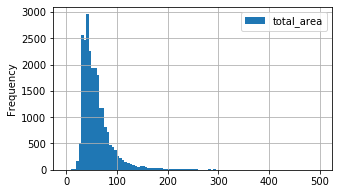

In [25]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))

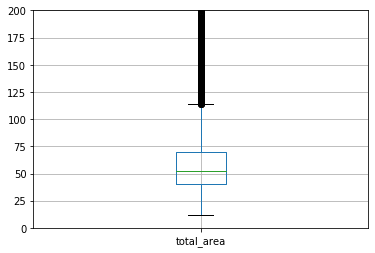

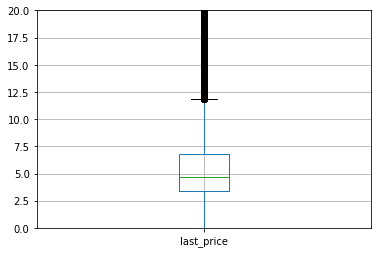

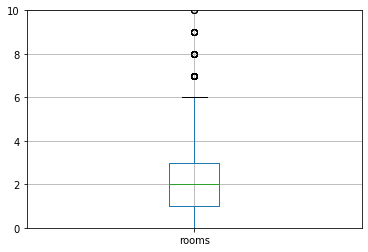

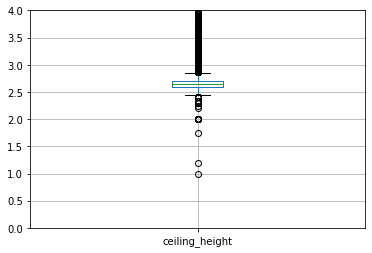

In [26]:
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylim_list = [200, 20, 10, 4]
for n in range(4):
    df.boxplot(column=column_list[n]).set_ylim(0,ylim_list[n])
    plt.show()

<div style="border:solid green 2px; padding: 20px"> <b>Отлично:</b><br>
 
Здорово, что ты автоматизировала процесс построения боксплотов через цикл `for` 🔥 </div>     

Определим границы:
* total_area: 20 - 120 кв. м.;
* last_price: 0 - 12 млн. руб.;
* rooms: 0-6;
* celling_height: 2,2 - 3,2 м..

Создадим отфильтрованную таблицу без выбросов.

In [27]:
data_filtered = df.query(
    'last_price < 12 and ceiling_height < 3.2 and ceiling_height > 2.2 and total_area >= 20 and total_area <= 120 and rooms < 6')

print('Процент строк от которых избавились: {:.2%}'.format(1 - len(data_filtered['last_price']) / len(df['last_price'])))

Процент строк от которых избавились: 11.75%


Построим гистограмму для каждго параметра.

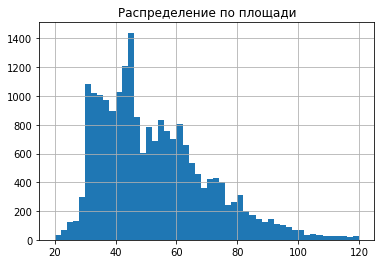

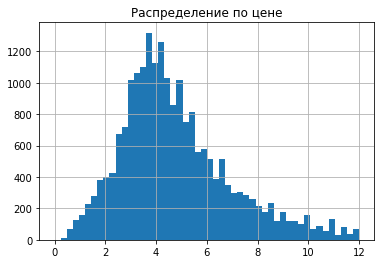

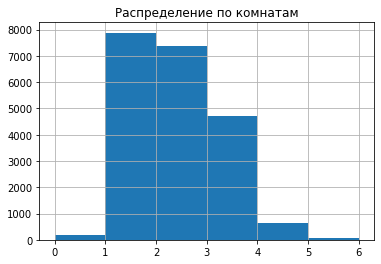

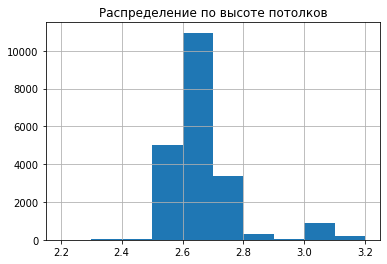

In [28]:
data_filtered['total_area'].hist(bins=50, range=(20, 120))
plt.title('Распределение по площади')
plt.show()

data_filtered['last_price'].hist(bins=50, range=(0, 12))
plt.title('Распределение по цене')
plt.show()

data_filtered['rooms'].hist(bins=6, range=(0, 6))
plt.title('Распределение по комнатам')
plt.show()

data_filtered['ceiling_height'].hist(bins=10, range=(2.2, 3.2))
plt.title('Распределение по высоте потолков')
plt.show()

Вывод:
1. Распределение по площади. Наибольшая часть квартир имеет плозадь от 30 до 80 кв. м.
2. Распределение по цене. Большая часть квартир продаётся от 2 до 8 млн. р.
3. Распределение по комнатам. Больше всего комнат, имеющих 1, 2 или 3 комнаты, встречаются и с большим количеством комнат, но таких квартир гораздо меньше.
4. Распределение по высоте потолков. Больше всего квартир с потолками от 2.5 до 2.8 м.

Задача 2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [29]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,23650.000000
mean,156.448964
std,213.564548
min,0.000000
25%,22.000000
50%,73.000000
75%,198.000000
max,1580.000000


In [30]:
print('Медианное значение длительности продажи квартир', df['days_exposition'].median())

Медианное значение длительности продажи квартир 73.0


Среднее время продажи квартиры 180 дней, медианное время 95 дней. В основном квартиры продаются от 45 дней до 231 дня.

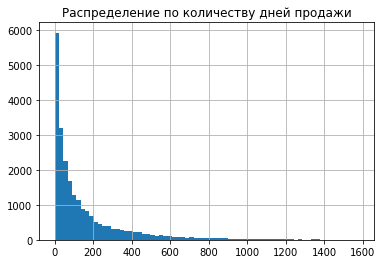

In [31]:
df['days_exposition'].hist(bins=70)
plt.title('Распределение по количеству дней продажи')
plt.show()

Большинство квартир продаётся до 200 дней. Посмотрим на наличие выбросов.

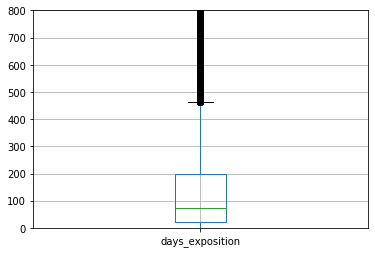

In [32]:
df.boxplot(column='days_exposition').set_ylim(0, 800)
plt.show()

Установим ограничение 1 до 500 дней.

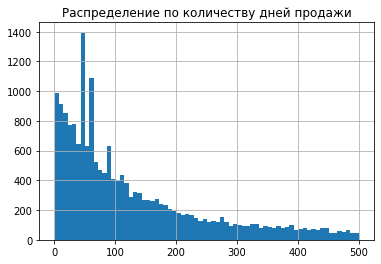

In [33]:
df['days_exposition'].hist(bins=70, range=(1, 500))
plt.title('Распределение по количеству дней продажи')
plt.show()

Чаще всего квартиры продаются в первые 100 дней, и чем больше времени проходит, тем меньше квартир остаётся в продаже. Можно сказать, что если квартира продалась в первые 50 дней то она продалась быстро, а если спустя более 200 дней - долго.

Также в районе 50 дней есть необычно частые продажи, посмотрим подробнее.

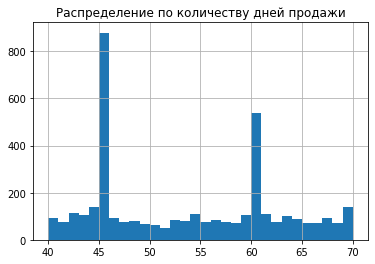

In [34]:
df['days_exposition'].hist(bins=30, range=(40, 70))
plt.title('Распределение по количеству дней продажи')
plt.show()

Есть неествественные пики продаж в 45 и 60 дней. Скорее всего в эти дни квартиры автоматически снимаются с продажи.

Задача 3. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Изучим зависимость цены квадратного метра от общей площади квартиры.

0.30220181209172897

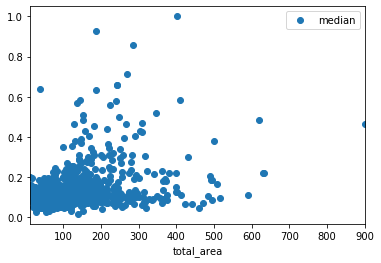

In [35]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['total_area'].corr(df['price_per_square_meter'])

Кореляция есть, но очень слабая. Это значит, что с увеличением площади рост цены есть, но не велик.

Изучим зависимость цены квадратного метра от числа комнат.

0.05547063298471476

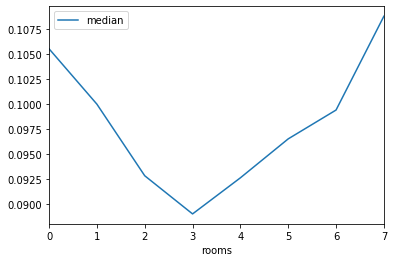

In [36]:
pivot_table_rooms = df.pivot_table(
    index = 'rooms', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

df['rooms'].corr(df['price_per_square_meter'])

Коэффициент корреляции умеренный. Связь между количством комнат и ценой есть, однако по графику можно сделать вывод что цена квадратного метра дешевле всего у трёхкомнатных квартир.

Изучим зависимость цены квадратного метра от этажа (первого, последнего, другого).

,mean,count,median
floor_name,,,
другой,0.103508,17408,0.098305
первый,0.081989,2912,0.081237
последний,0.093379,3330,0.087763


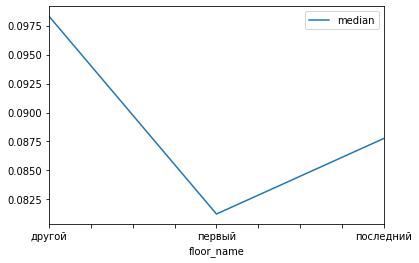

In [37]:
pivot_table_floor_name = df.pivot_table(
        index = 'floor_name', 
        values = 'price_per_square_meter', 
        aggfunc = ['mean', 'count', 'median'])

pivot_table_floor_name.columns = ['mean', 'count', 'median']
pivot_table_floor_name.plot(y = 'median')
pivot_table_floor_name

Судя по медиане, самые дешёвые квртиры на первом этаже, дороже на последнем и самы дорогие на другом этаже.

Изучим зависимость цены квадратного метра от удалённости от центра.

-0.31809933802323276

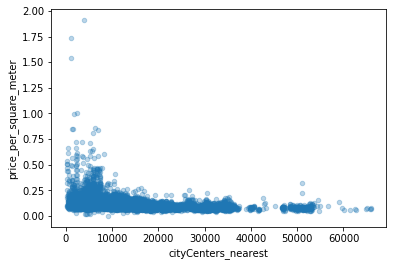

In [38]:
df.plot(
    kind = 'scatter', 
    y = 'price_per_square_meter', 
    x = 'cityCenters_nearest', 
    alpha = 0.3)

df['cityCenters_nearest'].corr(df['price_per_square_meter'])

На графике виден рост цены квадратного метра в зависимости от приближённости квартиры к центру, однако после 20 км эта зависимость пропадает и цены за метр примерно одинаковы.

Изучим зависимость цены квадратного метра от дня недели.

,mean,count,median
day,,,
1,0.099725,4175,0.095634
2,0.099606,3966,0.095474
3,0.100193,4286,0.095153
0,0.099470,3606,0.094704
4,0.098987,3992,0.094608
6,0.097763,1692,0.094595
5,0.099066,1933,0.093548


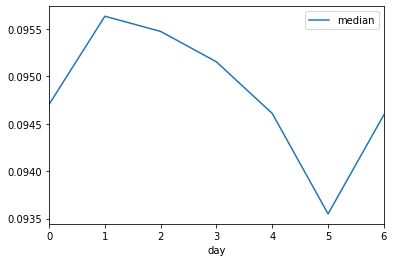

In [39]:
pivot_table_day_exposition = df.pivot_table(
    index = 'day', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

pivot_table_day_exposition.columns = ['mean', 'count', 'median']
pivot_table_day_exposition.plot(y = 'median')

pivot_table_day_exposition.sort_values('median', ascending = False)

Выставленные во вторник квариры самые дорогие, а в субботы самы дешёвые. Возможно стоимость зависит от активности людей в рабочие и выходные дни.

Изучим зависимость цены квадратного метра от месяца.

,mean,count,median
month,,,
4,0.101957,2373,0.096452
8,0.100147,1742,0.096103
11,0.099254,2367,0.095625
9,0.100491,1979,0.095609
3,0.098998,2582,0.095293
1,0.099838,1491,0.095210
7,0.099651,1690,0.095019
2,0.098770,2639,0.095000
12,0.099502,1638,0.094238


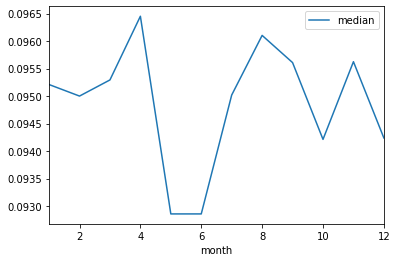

In [40]:
pivot_table_month_exposition = df.pivot_table(
    index = 'month', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Cамая высокая стоимость метра в апрелеи августе. Самая низкая стоимость в мае и июне. Цена в данном случае может зависеть от отпусков людей.

Изучим зависимость цены квадратного метра от года.

,mean,count,median
year,,,
2014,0.124302,136,0.106902
2019,0.107124,2879,0.103306
2018,0.097800,8512,0.095704
2015,0.104719,1173,0.093396
2017,0.097637,8185,0.092570
2016,0.098295,2765,0.091667


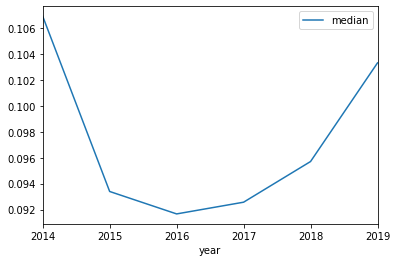

In [41]:
pivot_table_year_exposition = df.pivot_table(
    index = 'year', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Самые дорогие квартиры были в 2014 году, зтем был резкий спад к 2015 году, в 2016 цены были самые низкие, но к 2019 году цены снова выросли почти до уровня 2014 года. Однако, это лишь медианное значение, по факту, цены аналогичных квартир могли вести себя по-другому.

Задача 4. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [42]:
locality_pivot_table = df.pivot_table(
    index = 'locality_name', 
    values = 'price_per_square_meter', 
    aggfunc=['count', 'mean'])

locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
санкт-петербург,15721,0.114849
поселок мурино,556,0.085682
поселок шушары,440,0.078677
всеволожск,398,0.068654
пушкин,369,0.103126
колпино,338,0.075425
поселок парголово,327,0.090176
гатчина,307,0.068746
деревня кудрово,299,0.092473


Населённый пункт с самой высокой стоимостью жилья.


In [43]:
locality_pivot_table[ locality_pivot_table['mean'] == locality_pivot_table['mean'].max() ]

,count,mean
locality_name,,
санкт-петербург,15721,0.114849


Населённый пункт с самой низкой стоимостью жилья.

In [44]:
locality_pivot_table[ locality_pivot_table['mean'] == locality_pivot_table['mean'].min() ]

,count,mean
locality_name,,
выборг,237,0.058142


Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

Задача 5. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

Добавим столбец с растоянием от центра в киломметрах, заполним пропуски и приведём формат к целочисленному.

In [45]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999999)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')

,price_per_square_meter
cityCenters_nearest_km,
0,0.187324
1,0.166604
2,0.146663
3,0.129416
4,0.137475
5,0.146979
6,0.152278
7,0.141400
8,0.120581


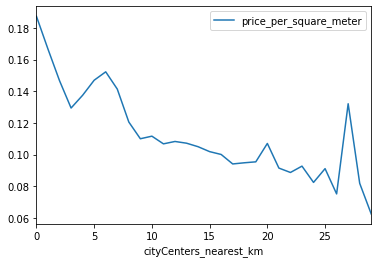

In [46]:
pivot_table_km = df.query(
    'locality_name == "санкт-петербург" and cityCenters_nearest_km !=999999'
    ).pivot_table(
        index = 'cityCenters_nearest_km', 
        values = 'price_per_square_meter', 
        aggfunc = 'mean')

pivot_table_km.plot()
pivot_table_km

Судя по ценам на метр квадратный, центром будем считать радиус в 8 км.

Задача 6. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Выделем квартиры в центре, т.е. те которые находятся в радиусе 8 км. от центра.

In [47]:
center_spb = df.query('cityCenters_nearest_km <= 8 and locality_name == "санкт-петербург"')

Зависимость цены квадратного метра от количества комнат.

0.020596648392453756

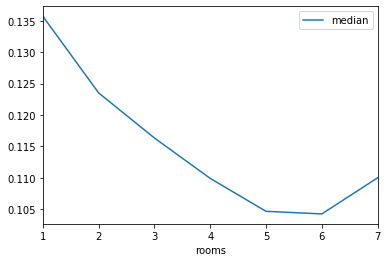

In [48]:
center_spb_rooms = center_spb.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb['rooms'].corr(center_spb['price_per_square_meter'])

Коэффициент корреляции совсем маленький, что значит связь между количеством комнат и ценой за метр квадратный в центре Питера отсутствует.

Зависимость стоимости квадратного метра от этажа.

,mean,count,median
floor_name,,,
другой,0.143497,3182,0.125916
первый,0.120248,466,0.106671
последний,0.141932,734,0.115765


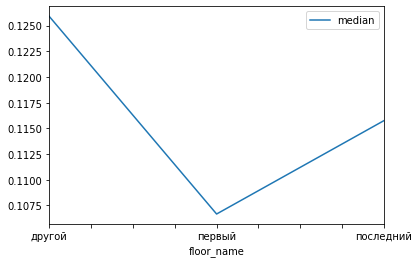

In [49]:
center_spb_floor = center_spb.pivot_table(
    index = 'floor_name', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

center_spb_floor.columns = ['mean', 'count', 'median']
center_spb_floor.plot(y = 'median')
center_spb_floor

Отличий между общей выборкой и по центру нет.

Зависимость цены квадратного метра от удалённости от центра.

-0.08776220219323898

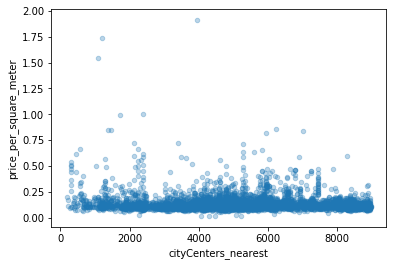

In [50]:
center_spb.plot(
    kind = 'scatter', 
    y = 'price_per_square_meter', 
    x = 'cityCenters_nearest', 
    alpha = 0.3)

center_spb['cityCenters_nearest'].corr(center_spb['price_per_square_meter'])

Зависимости нет, что ожидаемо, т.к. мы сделали выбрку по центру города.

Зависимость стоимости квадратного метра от дня недели размещения объявления.

,mean,count,median
day,,,
6,0.141316,259,0.125483
5,0.149387,326,0.124756
0,0.141434,662,0.123330
2,0.139561,748,0.122897
4,0.138945,738,0.122301
3,0.140225,897,0.121351
1,0.139860,752,0.120104


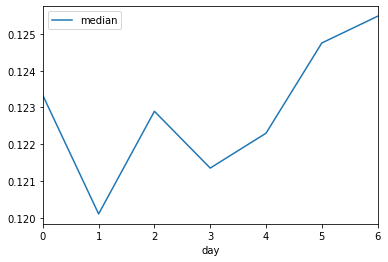

In [51]:
center_spb_day_exposition = center_spb.pivot_table(
    index = 'day', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

center_spb_day_exposition.columns = ['mean', 'count', 'median']
center_spb_day_exposition.plot(y = 'median')

center_spb_day_exposition.sort_values('median', ascending = False)

График отличается от общей выборки. Здесь, самые дшёвые квартиры в четверг и воскресенье и самы дорогие в понедельник и пятницу.

Зависимость цены квадратного метра от месяца размещения объявления.

,mean,count,median
month,,,
3,0.142075,472,0.129373
1,0.141894,271,0.126966
5,0.135570,258,0.125113
8,0.141596,325,0.125000
4,0.149124,414,0.122757
9,0.139281,388,0.122449
11,0.137896,431,0.121386
2,0.140405,460,0.120747
10,0.135665,375,0.120120


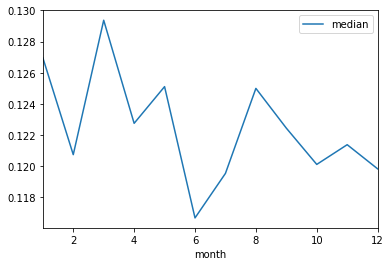

In [52]:
center_spb_month_exposition = center_spb.pivot_table(
    index = 'month', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')

center_spb_month_exposition.sort_values('median', ascending = False)

График похож на график по общей выборке, здесь самые низкие цены за метр в мае и июне, а самые высокие цены в апреле и августе.

Зависимость цены квадратного метра от года размещения объявления.

,mean,count,median
year,,,
2019,0.153147,486,0.133333
2018,0.136996,1347,0.123110
2015,0.142285,368,0.119912
2017,0.138519,1552,0.119383
2016,0.141635,591,0.119048


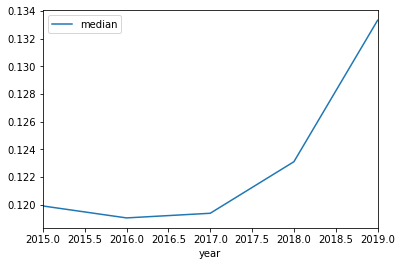

In [53]:
center_spb_year_exposition = center_spb.pivot_table(
    index = 'year', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y = 'median')

center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

В отличие от генеральной совокупности, цены на квадратный метр не падали в 2016 годах, а возрастали.

## Общий вывод

Мы изучили и обработали полученные данных. Изучая время продажи квартир по дням мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры. Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 500 дней. На стоимость квадратного метра больше всего влияют количество комнат, этаж и близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. Нужно учитывать, что в 2016-2017 годах стоимость квартир в среднем по рынку упала, а после снов возрасла, но в центре Санкт-Петербурге наблюдался только рост цен. В данном случае имело место постоянное удорожание стоимости, начиная с 2015 года по 2019 год. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 3 километров.

Важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели в целом. Возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-другому. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод